# Final presentation: Code edits

## ToDo:

### Code
- [x] Get rid of unnecessary view creation for allocation OR use only a view entirely for data
- [x] Add appropriate constraints
- [x] Get rid of session ID table, remake ERD and describe why in presentation
- [x] Add investment amount
- [x] Batch queries from yfinance
- [ ] Test SSL path on school comp ubuntu

### Claude suggestions

Based on the provided program and helper files, here are some observations regarding potential redundancies and opportunities for optimization:

1. Database connection handling:
The program uses separate functions for connecting to and closing the database connection. This is generally a good practice, but there may be room for improvement by using a context manager to handle connections more efficiently.

2. Session ID generation:
The use of UUID for session ID generation is appropriate. However, consider if a simpler identifier would suffice, as UUIDs can be unnecessarily long for some use cases.

3. Input validation:
The ticker validation logic in the main function is well-structured, but it could potentially be moved to a separate function to improve readability and reusability.

4. Error handling:
The program has good error handling practices, using try-except blocks to catch and handle exceptions. However, some error messages could be more specific to help with debugging.

5. Data fetching and processing:
The separation of data fetching (get_stock) and processing (calculate_efficient_frontier) functions is good for modularity. However, ensure that these functions are not duplicating work unnecessarily.

6. Allocation data handling:
The fetch_allocation_data and print_allocation_data functions are well-separated, promoting good code organization.

7. Cleanup process:
The cleanup_session_tables function is called within a try-except block in the finally clause, which is a good practice for ensuring cleanup occurs even if errors are encountered.

8. Commented out code:
There's a commented-out line (# delete_all_tables(connection)) which should be removed if it's no longer needed.

9. Yfinance usage:
The ticker_exists function uses yfinance to check for valid tickers. Consider caching these results to avoid unnecessary API calls if the same tickers are checked multiple times.

10. File structure:
The program is well-organized into separate files (connect.py, db_setup.py, get_sh.py, ef.py), which helps with code maintainability. However, ensure that there's no duplication of functionality across these files.

To further optimize the code:

1. Consider using a configuration file for database settings and other constants to avoid hardcoding.
2. Implement logging instead of print statements for better debugging and error tracking.
3. Use type hints to improve code readability and catch potential type-related errors early.
4. Consider using asynchronous programming for I/O-bound operations like database queries and API calls to improve performance.
5. Implement unit tests to ensure the reliability of individual functions and make refactoring easier.

Overall, the program structure is good, with clear separation of concerns and modular design. The main areas for improvement are in fine-tuning error handling, potentially optimizing database operations, and ensuring no hidden redundancies exist across the helper files.

Citations:
[1] https://www.softformance.com/blog/how-to-speed-up-python-code/
[2] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/22098966/84866e9d-cab0-4b46-8471-ddcfe7df52cf/db_setup.py
[3] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/22098966/126c50ae-09f4-40d2-b6db-baa3b374435c/connect.py
[4] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/22098966/0f4bea50-54af-4a0f-a7b8-b769c9e6aaf1/get_sh.py
[5] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/22098966/438b47fc-e1da-4652-b0aa-335b8d5d6d2f/ef.py
[6] https://sunscrapers.com/blog/python-code-optimization-tips-for-experts/
[7] https://stackify.com/how-to-optimize-python-code/
[8] https://www.keyskillset.com/resources/avoid-duplicating-code

### Edit 1: ERD

- The original ERD contained an "SID" table which was meant to distinguish session tables
- This was unnecessary as, in practice, it was more efficient and effective to use UUID as a precursor to each table
  - The UUID of each running instance is hardcoded into the table names to ensure they only reference one another, thus no need for extra SQL code to check session ID's

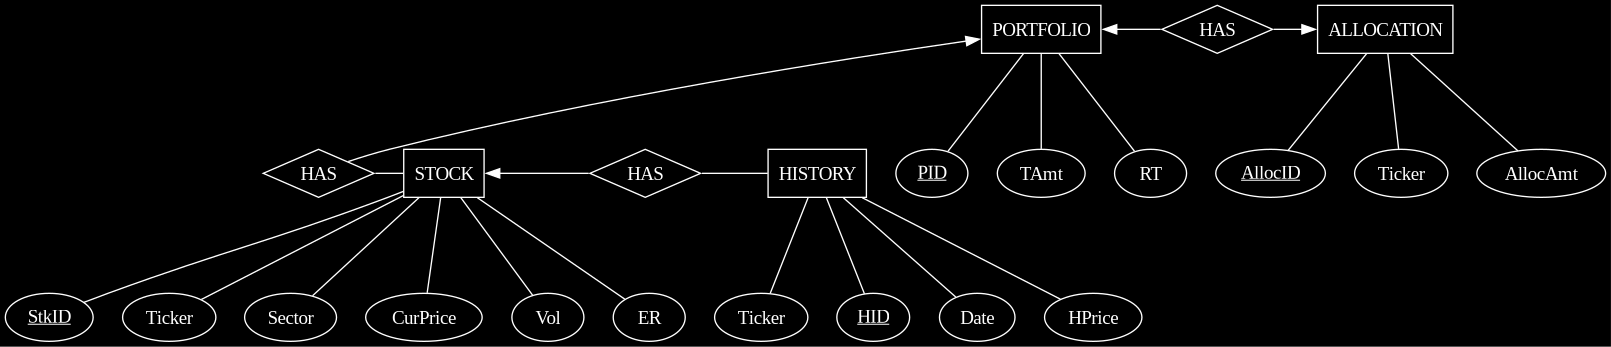

In [27]:
# Create ERD

from graphviz import Digraph

# Create a new directed graph
dot1 = Digraph(comment='ERD2')

# Set graph attributes for a black background and white nodes and edges
dot1.attr(bgcolor='black')
dot1.attr('node', color='white', fontcolor='white', style='filled', fillcolor='black')
dot1.attr('edge', color='white')
dot1.attr('graph', ranksep='1', nodesep='0.3')  # Reduced nodesep

# Add main entity nodes with shortened names
dot1.node('S', 'STOCK', shape='rectangle')
dot1.node('P', 'PORTFOLIO', shape='rectangle')
dot1.node('A', 'ALLOCATION', shape='rectangle')
dot1.node('H', 'HISTORY', shape='rectangle')

# Add relationship nodes
dot1.node('H2', 'HAS', shape='diamond')
dot1.node('H3', 'HAS', shape='diamond')
dot1.node('H4', 'HAS', shape='diamond')

# Add subgraph for organizing nodes horizontally
with dot1.subgraph() as s:
    s.attr(rank='same')
    s.node('P')
    s.node('A')
    s.node('H3')

with dot1.subgraph() as s2:
    s2.attr(rank='same')
    s2.node('S')
    s2.node('H')
    s2.node('H2')
    s2.node('H4')

# Add relationship edges
dot1.edge('P', 'H2', dir='back')
dot1.edge('H2', 'S', arrowhead='none')

dot1.edge('P', 'H3', dir='back')
dot1.edge('H3', 'A')

dot1.edge('S', 'H4', dir='back')
dot1.edge('H4', 'H', arrowhead='none')

# Add attribute edges (separate nodes for each attribute)
# Stock
dot1.node('StkID', '<<u>StkID</u>>', shape='ellipse')
dot1.node('Ticker', 'Ticker', shape='ellipse')
dot1.node('Sector', 'Sector', shape='ellipse')
dot1.node('CurP', 'CurPrice', shape='ellipse')  # CurrentPrice
dot1.node('Vol', 'Vol', shape='ellipse')  # Volatility
dot1.node('ER', 'ER', shape='ellipse')  # ExpectedReturn
dot1.edge('S', 'StkID', arrowhead='none')
dot1.edge('S', 'Ticker', arrowhead='none')
dot1.edge('S', 'Sector', arrowhead='none')
dot1.edge('S', 'CurP', arrowhead='none')
dot1.edge('S', 'Vol', arrowhead='none')
dot1.edge('S', 'ER', arrowhead='none')

# Portfolio
dot1.node('PID', '<<u>PID</u>>', shape='ellipse')
dot1.node('TAmt', 'TAmt', shape='ellipse')  # TotalAmount
dot1.node('RT', 'RT', shape='ellipse')  # RiskTolerance
dot1.edge('P', 'PID', arrowhead='none')
dot1.edge('P', 'TAmt', arrowhead='none')
dot1.edge('P', 'RT', arrowhead='none')

# Allocation
dot1.node('AllocID', '<<u>AllocID</u>>', shape='ellipse')
dot1.node('Ticker2', 'Ticker', shape='ellipse')  # StockID
dot1.node('AllocAmt', 'AllocAmt', shape='ellipse')  # AllocatedAmount
dot1.edge('A', 'AllocID', arrowhead='none')
dot1.edge('A', 'Ticker2', arrowhead='none')
dot1.edge('A', 'AllocAmt', arrowhead='none')

# Stock History
dot1.node('Ticker3', 'Ticker', shape='ellipse')  # History
dot1.node('HID', '<<u>HID</u>>', shape='ellipse')  # HistStockID
dot1.node('Date', 'Date', shape='ellipse')
dot1.node('HPrice', 'HPrice', shape='ellipse')  # HistPrice
dot1.edge('H', 'HID', arrowhead='none')
dot1.edge('H', 'Ticker3', arrowhead='none')
dot1.edge('H', 'Date', arrowhead='none')
dot1.edge('H', 'HPrice', arrowhead='none')

# Render the graph
dot1.render('ERD2', format='png', cleanup=False)

# Display the graph inline in Jupyter Notebook (for Jupyter only)
from IPython.display import Image
Image(filename='ERD2.png')

### Edit 2: Remove unnecessary 'alloc' view

- Originally the code used an unnecessary `JOIN` operation to fetch and display info from the Allocation table (Contains the EF)
- Initially used a view to rid of join operation, realized it would be more efficient to simply `SELECT` the information

### Edit 3: Add constraints to SQL code

**TotalAmt (Total monetary amount)**
- Constraint: Non-negative float or decimal
- Rationale: Total amount should always be zero or positive

**Ticker (Stock ticker)**
- Constraint: String, 1-5 characters, uppercase letters
- Rationale: Stock tickers are typically 1-5 characters long and use uppercase letters

**Amount (Percentage as decimal)**
- Constraint: Float between 0 and 1 inclusive
- Rationale: Percentages expressed as decimals range from 0 to 1

**Sector (Industry of stock)**
- Constraint: String, predefined list of valid sectors
- Rationale: Sectors should be standardized for consistency and analysis

**Price (Stock price)**
- Constraint: Non-negative float or decimal, typically with 2-4 decimal places
- Rationale: Stock prices are always positive and often have cent precision

**Date (YYYY-MM-DD)**
- Constraint: String in YYYY-MM-DD format, valid calendar date
- Rationale: Ensures consistent date formatting and validity

### Edit 4: Add investment amount input/output

- Program previously returned the efficient frontier as a percentage of a portfolio
- Edited to take in an investment amount and output the ef as a percentage of that amount, legibility

### Edit 5: Batch yfinance queries

- Original code looped over ticker symbols, running one yfinance query for each ticker
- Updated code uses `yf.download(tickers)`, which downloads all stock data in a single query leading to faster and more efficient code. This also avoids errors that may arise when repeatedly querying yfinance due to rate limiting
- This also resulted in simplified code, as yf_getH (fetched history data from yf) and yf_getS (fetched stock data from yf) are no longer needed

### Edit 6: Clean up CLI output

- Original code contained debug statements, removed so that output only includes prompts and allocation output

### Future goals

- Add functionality to add 'nan' values returned when using timeframes greater than stock history - currently limited to a year or the timeframe of the newest stock